<a href="https://colab.research.google.com/github/ehsanpoorvahedi/Bikesharing/blob/main/bikesharing2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Bike Sharing/201707-citibike-tripdata.csv')

In [ ]:
trips_central_park= df[['start station name','end station name']].loc[((df['start station name']=='Central Park S & 6 Ave'))].value_counts()
links_central_park=pd.DataFrame.from_records(list(trips_central_park.index),columns=['start','end']) 
links_central_park['trips']=trips_central_park.values
links_central_park.to_csv('/content/drive/My Drive/Bike Sharing/bikesharing/trips central park.csv')

In [ ]:
df['tripminutes'] = df['tripduration'] // 60

df['starttime'] = pd.to_datetime(df['starttime'])
df['stoptime'] = pd.to_datetime(df['stoptime'])

df['start hour']=df['starttime'].dt.hour.astype('category')
df['start day']=df['starttime'].dt.day.astype('category') 
df['weekday']=df['starttime'].dt.weekday.astype('category')

lon1, lat1, lon2, lat2 = map(np.radians, [df['start station longitude'], df['start station latitude'],df['end station longitude'], df['end station latitude']])
dlat = lat2 - lat1 
dlon = lon2 - lon1
a = (np.sin(dlat/2))**2 +np.cos(lat1) * np.cos(lat2) * (np.sin(dlon/2))**2 
c = 2 * np.arcsin( np.sqrt(a)) 
d = 6373  * c 
df['distance']=d

df

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,tripminutes,start hour,start day,weekday,distance
0,364,2017-07-01 00:00:00,2017-07-01 00:06:05,539,Metropolitan Ave & Bedford Ave,40.715348,-73.960241,3107,Bedford Ave & Nassau Ave,40.723117,-73.952123,14744,Subscriber,1986.0,1,6,0,1,5,1.102251
1,2142,2017-07-01 00:00:03,2017-07-01 00:35:46,293,Lafayette St & E 8 St,40.730207,-73.991026,3425,2 Ave & E 104 St,40.789211,-73.943708,19587,Subscriber,1981.0,1,35,0,1,5,7.678949
2,328,2017-07-01 00:00:08,2017-07-01 00:05:37,3242,Schermerhorn St & Court St,40.691029,-73.991834,3397,Court St & Nelson St,40.676395,-73.998699,27937,Subscriber,1984.0,2,5,0,1,5,1.727731
3,2530,2017-07-01 00:00:11,2017-07-01 00:42:22,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,398,Atlantic Ave & Furman St,40.691652,-73.999979,26066,Subscriber,1985.0,1,42,0,1,5,4.182992
4,2534,2017-07-01 00:00:15,2017-07-01 00:42:29,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,398,Atlantic Ave & Furman St,40.691652,-73.999979,29408,Subscriber,1982.0,2,42,0,1,5,4.182992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1735594,560,2017-07-31 23:59:33,2017-08-01 00:08:53,3260,Mercer St & Bleecker St,40.727064,-73.996621,236,St Marks Pl & 2 Ave,40.728419,-73.987140,16126,Subscriber,1990.0,2,9,23,31,0,0.813327
1735595,272,2017-07-31 23:59:35,2017-08-01 00:04:08,247,Perry St & Bleecker St,40.735354,-74.004831,434,9 Ave & W 18 St,40.743174,-74.003664,27684,Subscriber,1999.0,1,4,23,31,0,0.875411
1735596,1211,2017-07-31 23:59:37,2017-08-01 00:19:49,3303,Butler St & Court St,40.684989,-73.994403,3308,Kane St & Clinton St,40.686176,-73.996453,28402,Subscriber,1975.0,2,20,23,31,0,0.217489
1735597,547,2017-07-31 23:59:48,2017-08-01 00:08:56,276,Duane St & Greenwich St,40.717488,-74.010455,127,Barrow St & Hudson St,40.731724,-74.006744,30150,Subscriber,1992.0,1,9,23,31,0,1.614156


In [ ]:
trips_central_park = df[['start station name','end station name','tripminutes','start hour','distance']].loc[((df['start station name']=='Central Park S & 6 Ave'))]
central_park = pd.DataFrame(trips_central_park)
central_park = central_park.reset_index()
central_park = central_park.drop(columns=['index'])
central_park

,start station name,end station name,tripminutes,start hour,distance
0,Central Park S & 6 Ave,Cathedral Pkwy & Broadway,25,0,4.332674
1,Central Park S & 6 Ave,Central Park S & 6 Ave,36,6,0.000000
2,Central Park S & 6 Ave,W 41 St & 8 Ave,10,6,1.564206
3,Central Park S & 6 Ave,1 Ave & E 68 St,10,7,1.532891
4,Central Park S & 6 Ave,E 88 St & Park Ave,17,8,2.433232
...,...,...,...,...,...
9508,Central Park S & 6 Ave,West End Ave & W 107 St,25,22,4.085643
9509,Central Park S & 6 Ave,E 20 St & 2 Ave,27,22,3.374976
9510,Central Park S & 6 Ave,Central Park S & 6 Ave,30,23,0.000000
9511,Central Park S & 6 Ave,Broadway & W 58 St,25,23,0.465563


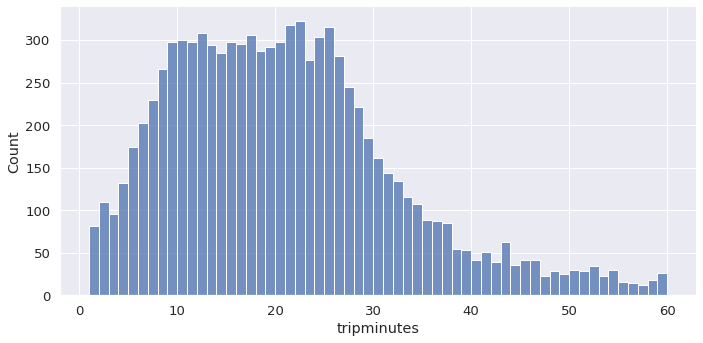

In [ ]:
sns.set(font_scale = 1.2)
tripdistribution = sns.displot(data=central_park,x="tripminutes", bins=range(1,61), aspect=10/5)
plt.savefig('/content/drive/My Drive/Bike Sharing/bikesharing/duratuon_centralpark.png')

<Figure size 864x720 with 0 Axes>

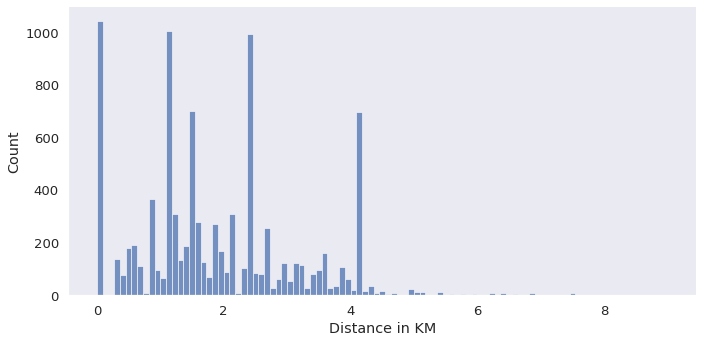

In [ ]:
plt.figure(figsize=(12,10))
bin = np.linspace(0,9,100)
sns.set(font_scale = 1.2)
sns.displot(data=central_park,x="distance", bins=bin, aspect=10/5,)

plt.grid(False)
plt.xlabel('Distance in KM')
plt.ylabel('Count')
plt.show
plt.savefig('/content/drive/My Drive/Bike Sharing/bikesharing/distance_centralpark.png')

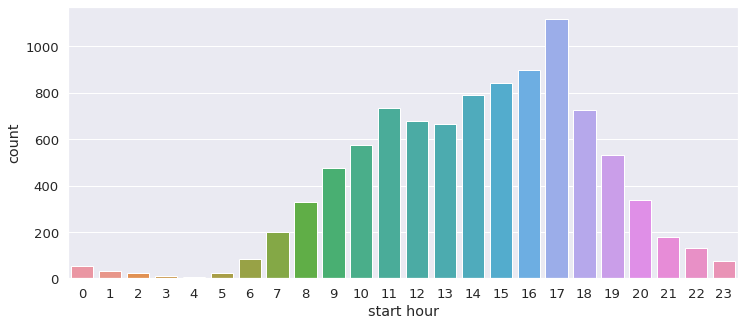

In [ ]:
plt.figure(figsize=(12,5))
sns.set(font_scale = 1.2)
rides_hour= sns.countplot(data=central_park, x="start hour" )
plt.savefig('/content/drive/My Drive/Bike Sharing/bikesharing/starthour_centralpark.png')

In [ ]:
Central_Park_S6Ave = central_park[['start station name','end station name','tripminutes','start hour','distance']].loc[((central_park['end station name']=='Central Park S & 6 Ave'))]
central_park_S6Ave = pd.DataFrame(Central_Park_S6Ave)
central_park_S6Ave = central_park_S6Ave.reset_index()
central_park_S6Ave = central_park_S6Ave.drop(columns=['index'])
central_park_S6Ave

,start station name,end station name,tripminutes,start hour,distance
0,Central Park S & 6 Ave,Central Park S & 6 Ave,36,6,0.0
1,Central Park S & 6 Ave,Central Park S & 6 Ave,26,8,0.0
2,Central Park S & 6 Ave,Central Park S & 6 Ave,26,8,0.0
3,Central Park S & 6 Ave,Central Park S & 6 Ave,21,8,0.0
4,Central Park S & 6 Ave,Central Park S & 6 Ave,20,9,0.0
...,...,...,...,...,...
1040,Central Park S & 6 Ave,Central Park S & 6 Ave,22,18,0.0
1041,Central Park S & 6 Ave,Central Park S & 6 Ave,32,19,0.0
1042,Central Park S & 6 Ave,Central Park S & 6 Ave,49,21,0.0
1043,Central Park S & 6 Ave,Central Park S & 6 Ave,47,21,0.0


In [ ]:
Central_Park_other = central_park[['start station name','end station name','tripminutes','start hour','distance']].loc[((central_park['end station name']!='Central Park S & 6 Ave'))]
central_park_other = pd.DataFrame(Central_Park_other)
central_park_other = central_park_other.reset_index()
central_park_other = central_park_other.drop(columns=['index'])
central_park_other

,start station name,end station name,tripminutes,start hour,distance
0,Central Park S & 6 Ave,Cathedral Pkwy & Broadway,25,0,4.332674
1,Central Park S & 6 Ave,W 41 St & 8 Ave,10,6,1.564206
2,Central Park S & 6 Ave,1 Ave & E 68 St,10,7,1.532891
3,Central Park S & 6 Ave,E 88 St & Park Ave,17,8,2.433232
4,Central Park S & 6 Ave,E 88 St & Park Ave,17,8,2.433232
...,...,...,...,...,...
8463,Central Park S & 6 Ave,E 58 St & 3 Ave,3,22,0.943772
8464,Central Park S & 6 Ave,West End Ave & W 107 St,25,22,4.085643
8465,Central Park S & 6 Ave,E 20 St & 2 Ave,27,22,3.374976
8466,Central Park S & 6 Ave,Broadway & W 58 St,25,23,0.465563


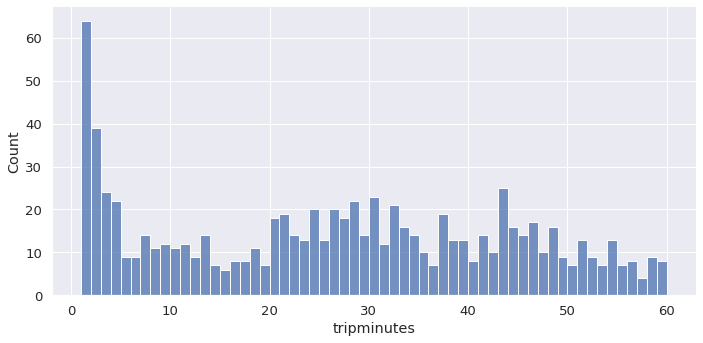

In [ ]:
sns.set(font_scale = 1.2)
tripdistribution = sns.displot(data=central_park_S6Ave,x="tripminutes", bins=range(1,61), aspect=10/5)
plt.savefig('/content/drive/My Drive/Bike Sharing/bikesharing/duratuon_centralparkloop.png')

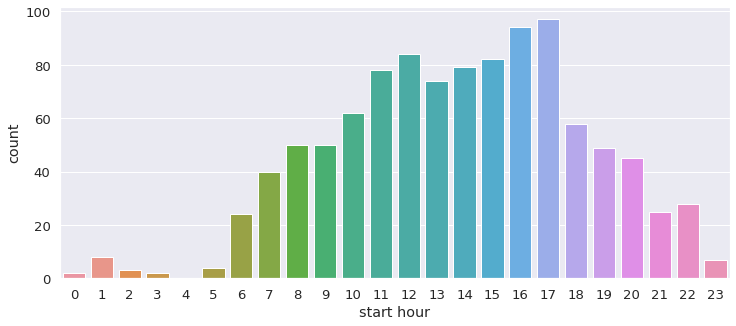

In [ ]:
plt.figure(figsize=(12,5))
sns.set(font_scale = 1.2)
rides_hour= sns.countplot(data=central_park_S6Ave, x="start hour" )
plt.savefig('/content/drive/My Drive/Bike Sharing/bikesharing/starthour_centralparkloop.png')

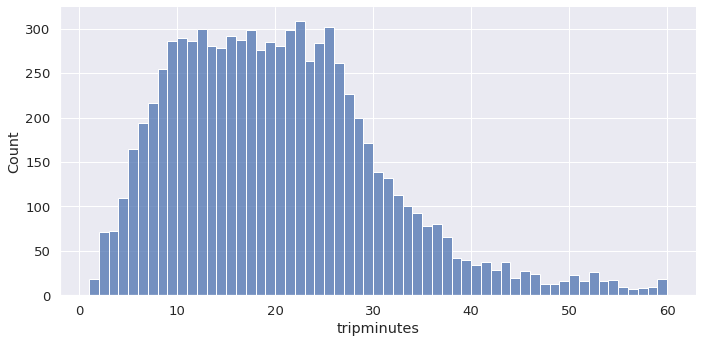

In [ ]:
sns.set(font_scale = 1.2)
tripdistribution = sns.displot(data=central_park_other,x="tripminutes", bins=range(1,61), aspect=10/5)
plt.savefig('/content/drive/My Drive/Bike Sharing/bikesharing/duratuon_centralparknoloop.png')

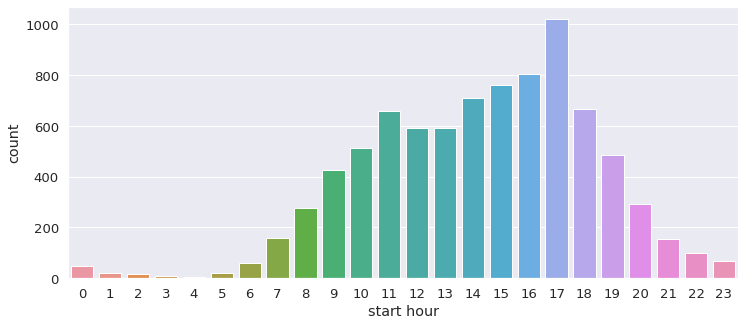

In [ ]:
plt.figure(figsize=(12,5))
sns.set(font_scale = 1.2)
rides_hour= sns.countplot(data=central_park_other, x="start hour" )
plt.savefig('/content/drive/My Drive/Bike Sharing/bikesharing/starthour_centralparknoloop.png')